In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import logging 

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
X ,y = np.load('X.npy')[0:1000:1,:],np.load('y.npy')[0:1000:1,:]

In [3]:
print(X.shape,'\n',y.shape)

(1000, 400) 
 (1000, 1)


In [4]:
print('First element of X is:',X[0,0],'\n','First element of y is :',y[0,0],'\n','Last element of y is:',y[-1,0])

First element of X is: 0.0 
 First element of y is : 0 
 Last element of y is: 1


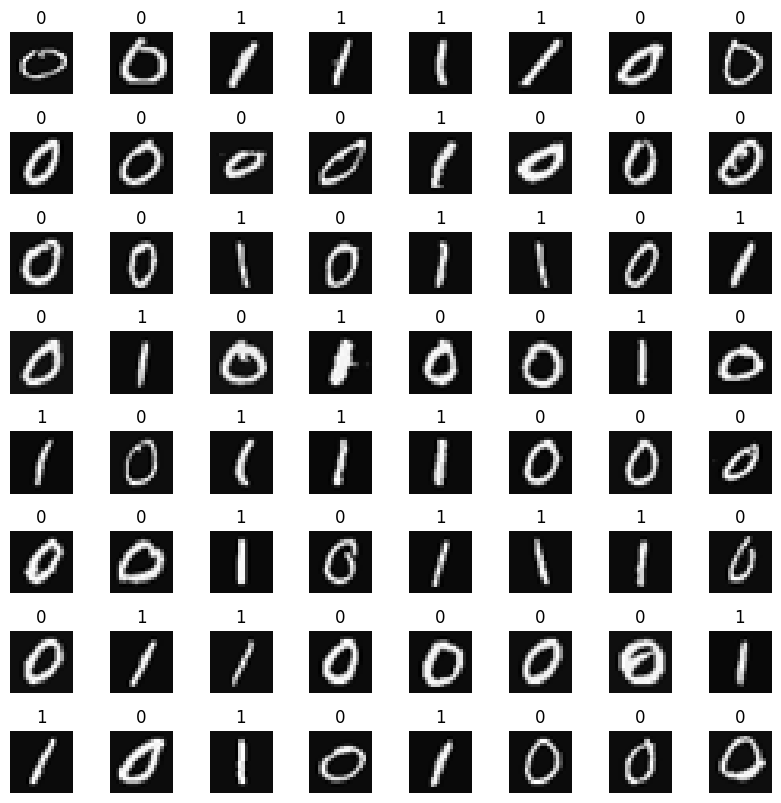

In [5]:
# Visualizing the data
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)

m,n = X.shape
fig,axes = plt.subplots(8,8,figsize= (8,8))
fig.tight_layout(pad= 0.1)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    #display the image
    ax.imshow(X_random_reshaped,cmap = 'gray')
    # display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    

In [6]:
# Model representation and tensorflow implementation 

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units = 25,activation = 'sigmoid',name = 'L1'),
        Dense(units=15,activation = 'sigmoid',name = 'L2'),
        Dense(units =1,activation='sigmoid',name = 'L3'),
    
    ],name = "my_model"
) 


In [7]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
[layer1,layer2,layer3] = model.layers

In [9]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()
print(f"w1 shape = {w1.shape},b1 shape = {b1.shape}")
print(f"w2 shape = {w2.shape},b2 shape = {b2.shape}")
print(f"w3 shape = {w3.shape},b3 shape = {b3.shape}")


w1 shape = (400, 25),b1 shape = (25,)
w2 shape = (25, 15),b2 shape = (15,)
w3 shape = (15, 1),b3 shape = (1,)


In [10]:
print(model.layers[2].weights)

[<tf.Variable 'L3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.306037  ],
       [-0.35215843],
       [ 0.37976503],
       [-0.42590982],
       [ 0.4645074 ],
       [-0.19945982],
       [-0.00959361],
       [ 0.30315673],
       [-0.48709178],
       [-0.00057977],
       [-0.54257464],
       [ 0.35880822],
       [-0.3860289 ],
       [ 0.12853384],
       [ 0.1382035 ]], dtype=float32)>, <tf.Variable 'L3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [11]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(0.001),


)
model.fit(
    X,y, 
    epochs = 20
    
)

Epoch 1/20
32/32 [==============================] - 3s 6ms/step - loss: 0.6226
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4637
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3178
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2149
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1525
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1146
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0905
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0740
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0621
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0530
Epoch 11/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0408
Epoch 13/20
32/32 [==============================

In [12]:
prediction = model.predict(X[0].reshape(1,400))
print(f"prediction a zero: { prediction}")
prediction = model.predict(X[500].reshape(1,400))
print(f' predicting a one: { prediction}')

1/1 [==============================] - 0s 232ms/step
prediction a zero: [[0.01766458]]
1/1 [==============================] - 0s 47ms/step
 predicting a one: [[0.98702395]]


In [13]:
# probability is compared to a threshold to make a prediction
if prediction>= 0.5:
    yhat = 1
else:
    yhat = 0
print(f'prediction after threshold : {yhat}')

prediction after threshold : 1


1/1 [==============================] - 0s 65ms/step


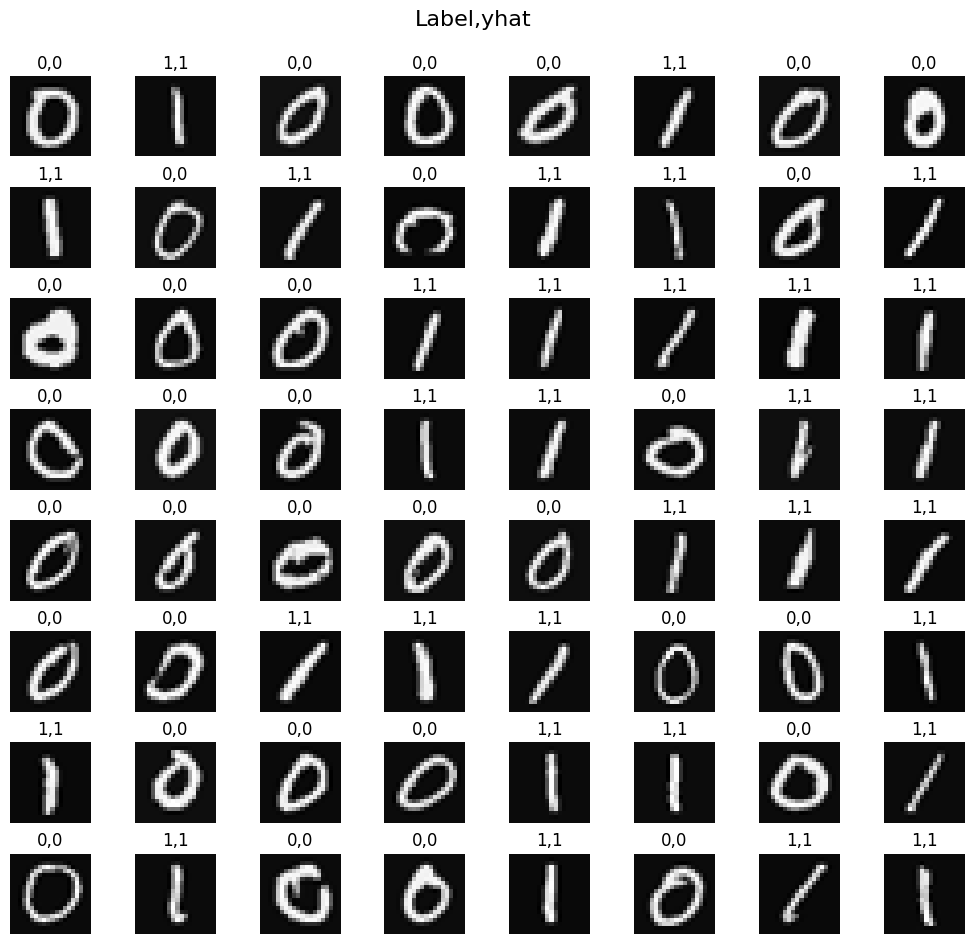

In [14]:
# comparing prediction vs label for random sample of 64 digits.
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8,figsize = (10,10))
fig.tight_layout(pad= 0.1,rect = [0,0.03,1,0.92])# [left ,bottom,right,top] 

for i,ax in enumerate(axes.flat):
    # selecting random index
    random_index = np.random.randint(m)
    # selectring rows corresponding to the random indices and 
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    #Display the image
    ax.imshow(X_random_reshaped,cmap='gray')
    
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction>=0.5:
        yhat = 1
    else:
        yhat = 0
    # Display the label above the image
    ax.set_title(f'{y[random_index,0]},{yhat}')
    ax.set_axis_off()
fig.suptitle('Label,yhat',fontsize = 16)
plt.show()

    

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [47]:
# Numpy model implementation (Forward Prop in Numpy)
# my_dense
def my_dense(a_in,w,b,g):
    units = w.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        w1 = w[:,i]
        z = np.dot(w1,a_in) + b[i]
        a_out[i] = g(z)
        
        
    return (a_out)


In [50]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,) 
w_tst =np.array([[0.1,0.2,0.3],[0.4,0.5,0.6]] ).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)
A_tst = my_dense(x_tst,w_tst,b_tst,sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [51]:
def my_sequential(x,w1,b1,we,b2,w,b3):
    a1= my_dense(x,w1,b1,sigmoid)
    a2= my_dense(a1,w2,b2,sigmoid)
    a3= my_dense(a2,w3,b3,sigmoid)
    return(a3)

In [52]:
w1_tmp,b1_tmp = layer1.get_weights()
w2_tmp,b2_tmp = layer2.get_weights()
w3_tmp,b3_tmp = layer3.get_weights()

In [53]:
prediction = my_sequential(X[0],w1_tmp,b1_tmp,w2_tmp,b2_tmp,w3_tmp,b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat =0
    
print("yhat =",yhat, "label",y[0,0])
prediction = my_sequential(X[500],w1_tmp,b1_tmp,w2_tmp,b2_tmp,w3_tmp,b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat= 0
print('yhat = ',yhat,'label =',y[500,0])

yhat = 0 label 0
yhat =  1 label = 1


1/1 [==============================] - 0s 59ms/step


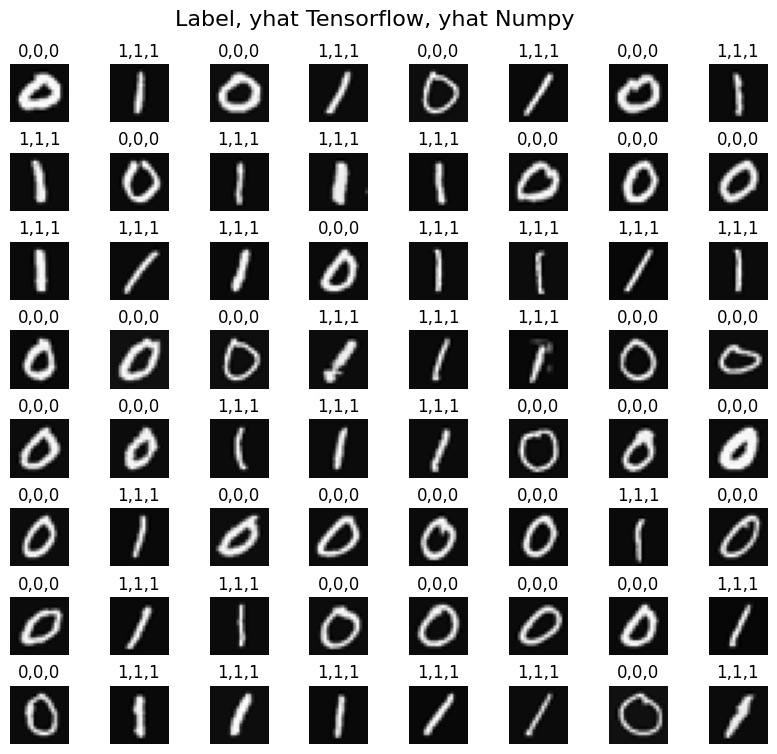

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], w1_tmp, b1_tmp, w2_tmp, b2_tmp, w3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

In [56]:
# Vectorized numpy model
x = X[0].reshape(-1,1) # column vector (400,1)
z1 = np.matmul(x.T,w1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(400,)
(1, 25)


In [57]:
def my_dense_v(a_in,w,b,g):
    z=np.matmul(a_in,w)+b
    a_out=g(z)
    return a_out


In [58]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1,3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [75]:
def my_sequential_v(x,w1,b1,w2,b2,w3,b3):
    a1 = my_dense_v(x,w1,b1,sigmoid)
    a2= my_dense_v(a1,w2,b2,sigmoid)
    a3= my_dense_v(a2,w3,b3,sigmoid)
    return(a3)


In [76]:
w1_t,b1_t=layer1.get_weights()
w2_t,b2_t= layer2.get_weights()
w3_t,b3_t= layer3.get_weights()


In [79]:
predict_v = my_sequential_v(X,w1_t,b1_t,w2_t,b2_t,w3_t,b3_t)
predict_v.shape

(1000, 1)

In [90]:
yhat_v = (predict_v>=0.5).astype(int)


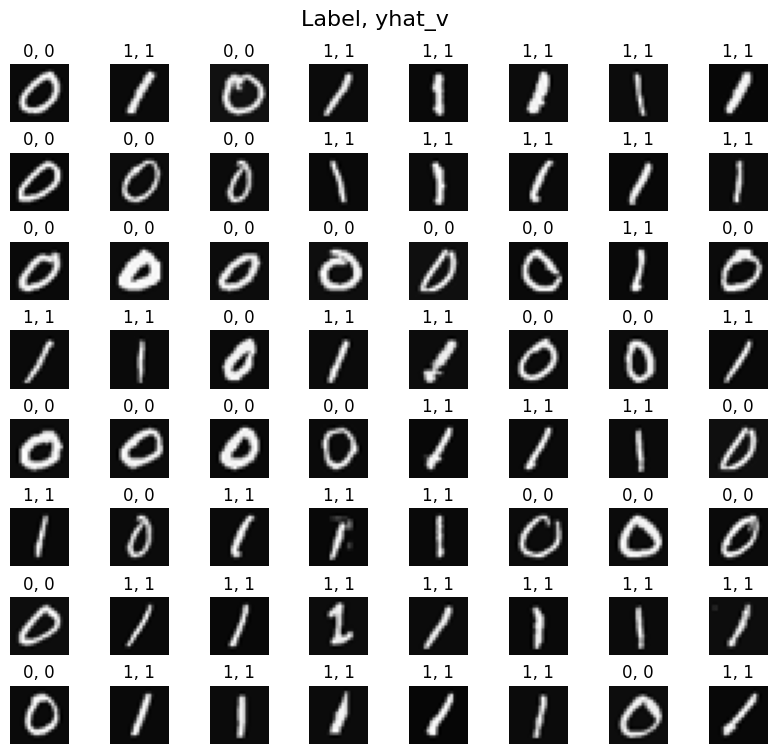

In [93]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {yhat_v[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat_v", fontsize=16)
plt.show()

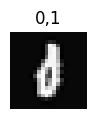

In [96]:
# To see misclassified images 
fig = plt.figure(figsize=(1,1))
errors = np.where(y!=yhat_v)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20,20)).T
plt.imshow(X_random_reshaped,cmap='gray')
plt.title(f'{y[random_index,0]},{yhat_v[random_index][0]}')
plt.axis('off')
plt.show()